<a href="https://colab.research.google.com/github/tibayo1/DL-Lung-Sounds/blob/master/Lung_Sounds_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json

# read file
with open('/content/kaggle (1).json', 'r') as myfile:
    data=myfile.read()
# parse file
obj = json.loads(data)
#get username and key
kaggle_key = str(obj['key'])
kaggle_username = str(obj['username'])


In [2]:
import os

# parse file
obj = json.loads(data)

os.environ['KAGGLE_USERNAME'] = kaggle_username # username from the json file
os.environ['KAGGLE_KEY'] = kaggle_key # key from the json file
!kaggle datasets download -d "vbookshelf/respiratory-sound-database" # api copied from kaggle



100% 3.67G/3.69G [01:11<00:00, 40.7MB/s]
100% 3.69G/3.69G [01:11<00:00, 55.5MB/s]


In [0]:
#unzip the folder downloaded from kaggle
!unzip 'respiratory-sound-database.zip'

In [0]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display
import pandas as pd

#to play audio
import IPython.display as ipd


In [6]:
os.listdir("/content/respiratory_sound_database/Respiratory_Sound_Database")

['patient_diagnosis.csv',
 'filename_format.txt',
 'audio_and_txt_files',
 'filename_differences.txt']

In [7]:
path = \
'/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.txt'

col_names = ['Beginning_of_respiratory_cycle', 'End_of_respiratory_cycle', 'Presence/absence_of_crackles', 'Presence/absence_of_wheezes']

# Respiratory cycle column values are in 'seconds'.
# Presence = 1
# Absence = 0

df_annot = pd.read_csv(path, sep="\t", header=None, names=col_names)

df_annot.head(10)

,Beginning_of_respiratory_cycle,End_of_respiratory_cycle,Presence/absence_of_crackles,Presence/absence_of_wheezes
0,1.330,3.804,0,0
1,3.804,6.396,0,0
2,6.396,8.938,1,0
3,8.938,11.580,1,0
4,11.580,14.072,1,0
5,14.072,17.049,1,0
6,17.049,19.490,1,0


In [8]:
! pip install pysoundfile


In [0]:
import librosa
from librosa import feature
import numpy as np
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff
]
 
fn_list_ii = [
 feature.rmse,
 feature.zero_crossing_rate
]
def get_feature_vector(y,sr): 
   feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
   feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii] 
   feature_vector = feat_vect_i + feat_vect_ii 
   return feature_vector

In [0]:
path = \
"/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/"
os.chdir(path)
wav_file = []
import glob
wav_file_2 = glob.glob("*.wav")
for file in wav_file_2:
  y , sr = librosa.load(file,sr=None)
  feature_vector = get_feature_vector(y, sr)
  wav_file.append(feature_vector)

In [12]:
print (wav_file)

[[0.8092191207106056, 442.26496467737167, 1949.202550785897, 315.68700576755657, 0.09416094, 0.002052028166715032], [0.516493912717265, 77.75995960720735, 226.05463554623555, 97.70261498516321, 0.28922078, 0.006066568527448071], [0.6812580297560331, 374.28191477445375, 1599.5869029616808, 356.49136340140745, 0.105673, 0.003218462075594893], [0.7816035872375242, 1386.9447155477437, 3763.7002912527714, 1661.5684398578062, 0.05133031, 0.00665428440583285], [0.8040417637487991, 957.8778839107258, 2939.073512157032, 990.7647963671649, 0.22248143, 0.004190206942832269], [0.7996485740372264, 1690.379152876669, 4130.088644538974, 2917.617799622751, 0.1549462, 0.0070822035512188046], [0.7972434748940499, 2086.555782301028, 4605.854574835637, 4534.207714787072, 0.13682611, 0.00906876859039466], [0.795701259502343, 1588.0191865777624, 3955.0936574427333, 2523.6464152278004, 0.27045903, 0.006444859075739989], [0.7421562632913903, 4107.6841867716375, 5851.664419308515, 11283.085999845836, 0.0085033

In [15]:
import csv
import pandas 

norm_output = 'normals_00.csv'
header =[
 'chroma_stft',
 'spectral_centroid',
 'spectral_bandwidth',
 'spectral_rolloff',
 'rmse',
 'zero_crossing_rate'
]
with open(norm_output,'+w') as f:
 csv_writer = csv.writer(f, delimiter = ',')
 csv_writer.writerow(header)
 csv_writer.writerows(wav_file)
df = pandas.read_csv('normals_00.csv')
print(df)

     chroma_stft  spectral_centroid  ...      rmse  zero_crossing_rate
0       0.809219         442.264965  ...  0.094161            0.002052
1       0.516494          77.759960  ...  0.289221            0.006067
2       0.681258         374.281915  ...  0.105673            0.003218
3       0.781604        1386.944716  ...  0.051330            0.006654
4       0.804042         957.877884  ...  0.222481            0.004190
..           ...                ...  ...       ...                 ...
915     0.838905         219.982300  ...  0.090060            0.001175
916     0.637838          98.489935  ...  0.310422            0.007471
917     0.818766         921.115254  ...  0.119253            0.002926
918     0.785713        1734.017256  ...  0.208560            0.007119
919     0.787083         830.260867  ...  0.361212            0.006058

[920 rows x 6 columns]


In [0]:
import soundfile as sf

# Define helper functions

# Load a .wav file. 
# These are 24 bit files. The PySoundFile library is able to read 24 bit files.
# https://pysoundfile.readthedocs.io/en/0.9.0/

def get_wav_info(wav_file):
    data, rate = sf.read(wav_file)
    return data, rate

# source: Andrew Ng Deep Learning Specialization, Course 5
def graph_spectrogram(wav_file):
    data, rate = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


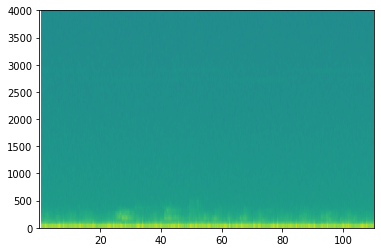

In [0]:
path = \
'/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.wav'
x = graph_spectrogram(path)

In [0]:
x, sr = librosa.load(path, sr=2000)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(40000,) 2000


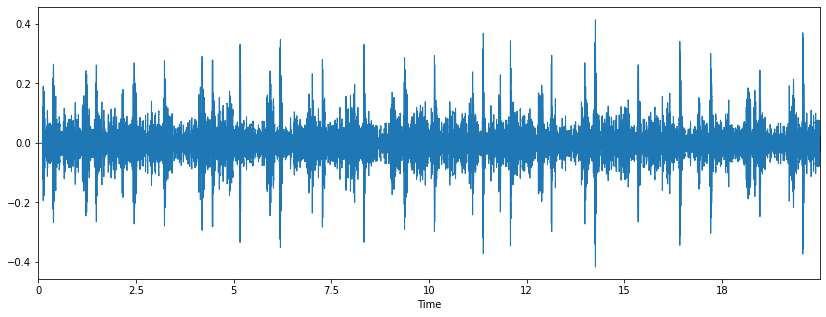

In [0]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

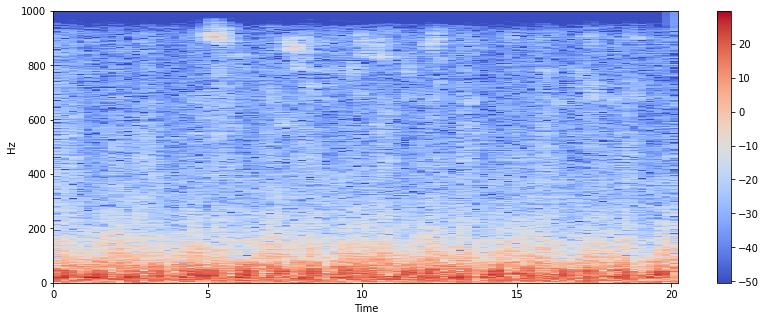

In [0]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one

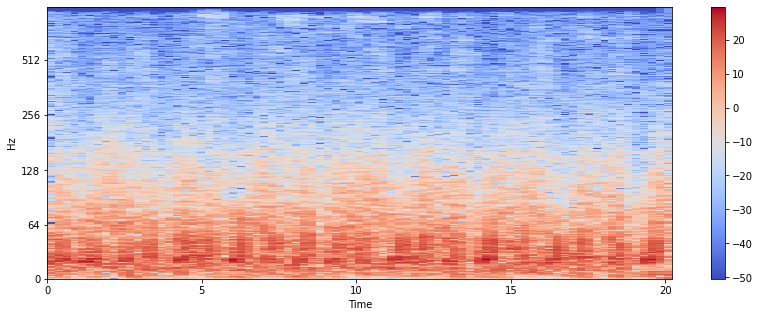

In [0]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [0]:

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [0]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(79,)

In [0]:
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

SyntaxError: ignored

In [0]:
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [0]:
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')